# Web Scraping with requests and Beautiful Soup

#### Imports Statements

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import time
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Create Pipeline

#### Create requests function for getting HTML Page

In [2]:
def get_web_page(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Referer": "http://example.com/previous-page",
        "Cookie": "session_id=your_session_id_here",
        "Connection": "keep-alive",
        "Cache-Control": "max-age=0"
    }
    # sleep to not get request limited
    time.sleep(.5)
    
    # response
    res = requests.get(url, headers=headers)
    
    if res.status_code == 200:
        return res.text
    
    else:
        print(f"Error {res.status_code} for URL {url}")
        return ""

#### Get URLS and pipline list ready

In [3]:
# URl
base = "https://pokemondb.net"
url_start = f"{base}/pokedex/game/scarlet-violet"

# List of Info
pipeline_list = []

#### Get HTML and soup || Pokemon links

In [4]:
html = get_web_page(url_start)
soup = bs(html, "html.parser")

# getting tags
cards = soup.select("div.infocard a.ent-name")
# pokemon url
pokemon_links = [base + a["href"] for a in cards]

#### Loop through each pokemon and scrape the data/values

In [5]:
# loop
for i, url in enumerate(pokemon_links[:400]):
    html = get_web_page(url)
    soup = bs(html, "html.parser")

    # Name
    name_tag = soup.select_one("h1")
    name = name_tag.text if name_tag else "N/A"

    # Types
    type_tags = soup.select(".vitals-table td a.type-icon")
    types = [t.text for t in type_tags] if type_tags else []

    # Catch rate & Egg cycles
    catch_rate = egg_cycles = None
    for table in soup.select("table.vitals-table"):
        for row in table.select("tr"):
            th = row.select_one("th")
            td = row.select_one("td")
            if not th or not td:
                continue
            if "Catch rate" in th.text:
                m = re.search(r'\d+', td.text)
                # Turn into int
                if m: catch_rate = int(m.group())
            if "Egg cycles" in th.text:
                m = re.search(r'\d+', td.text)
                # Turn into int
                if m: egg_cycles = int(m.group())

    # Total Base Stats
    total_base = None
    stats_table = soup.find("h2", string="Base stats")
    if stats_table:
        td_total = stats_table.find_next("td", class_="cell-total")
        if td_total:
            # Turn into int
            total_base = int(td_total.text)

    # Build dict
    pkm_dict = {
        "name": name,
        "types": types,
        "catch_rate": catch_rate,
        "egg_cycles": egg_cycles,
        "total_base_stats": total_base
    }

    pipeline_list.append(pkm_dict)
    print(f"Processed {i+1}/{len(pokemon_links[:400])} Pokémon...")

print("\nTotal Pokémon scraped:", len(pipeline_list))
pipeline_list


Processed 1/400 Pokémon...
Processed 2/400 Pokémon...
Processed 3/400 Pokémon...
Processed 4/400 Pokémon...
Processed 5/400 Pokémon...
Processed 6/400 Pokémon...
Processed 7/400 Pokémon...
Processed 8/400 Pokémon...
Processed 9/400 Pokémon...
Processed 10/400 Pokémon...
Processed 11/400 Pokémon...
Processed 12/400 Pokémon...
Processed 13/400 Pokémon...
Processed 14/400 Pokémon...
Processed 15/400 Pokémon...
Processed 16/400 Pokémon...
Processed 17/400 Pokémon...
Processed 18/400 Pokémon...
Processed 19/400 Pokémon...
Processed 20/400 Pokémon...
Processed 21/400 Pokémon...
Processed 22/400 Pokémon...
Processed 23/400 Pokémon...
Processed 24/400 Pokémon...
Processed 25/400 Pokémon...
Processed 26/400 Pokémon...
Processed 27/400 Pokémon...
Processed 28/400 Pokémon...
Processed 29/400 Pokémon...
Processed 30/400 Pokémon...
Processed 31/400 Pokémon...
Processed 32/400 Pokémon...
Processed 33/400 Pokémon...
Processed 34/400 Pokémon...
Processed 35/400 Pokémon...
Processed 36/400 Pokémon...
P

Processed 288/400 Pokémon...
Processed 289/400 Pokémon...
Processed 290/400 Pokémon...
Processed 291/400 Pokémon...
Processed 292/400 Pokémon...
Processed 293/400 Pokémon...
Processed 294/400 Pokémon...
Processed 295/400 Pokémon...
Processed 296/400 Pokémon...
Processed 297/400 Pokémon...
Processed 298/400 Pokémon...
Processed 299/400 Pokémon...
Processed 300/400 Pokémon...
Processed 301/400 Pokémon...
Processed 302/400 Pokémon...
Processed 303/400 Pokémon...
Processed 304/400 Pokémon...
Processed 305/400 Pokémon...
Processed 306/400 Pokémon...
Processed 307/400 Pokémon...
Processed 308/400 Pokémon...
Processed 309/400 Pokémon...
Processed 310/400 Pokémon...
Processed 311/400 Pokémon...
Processed 312/400 Pokémon...
Processed 313/400 Pokémon...
Processed 314/400 Pokémon...
Processed 315/400 Pokémon...
Processed 316/400 Pokémon...
Processed 317/400 Pokémon...
Processed 318/400 Pokémon...
Processed 319/400 Pokémon...
Processed 320/400 Pokémon...
Processed 321/400 Pokémon...
Processed 322/

[{'name': 'Sprigatito',
  'types': ['Grass'],
  'catch_rate': 45,
  'egg_cycles': 20,
  'total_base_stats': 310},
 {'name': 'Floragato',
  'types': ['Grass'],
  'catch_rate': 45,
  'egg_cycles': 20,
  'total_base_stats': 410},
 {'name': 'Meowscarada',
  'types': ['Grass', 'Dark'],
  'catch_rate': 45,
  'egg_cycles': 20,
  'total_base_stats': 530},
 {'name': 'Fuecoco',
  'types': ['Fire'],
  'catch_rate': 45,
  'egg_cycles': 20,
  'total_base_stats': 310},
 {'name': 'Crocalor',
  'types': ['Fire'],
  'catch_rate': 45,
  'egg_cycles': 20,
  'total_base_stats': 411},
 {'name': 'Skeledirge',
  'types': ['Fire', 'Ghost'],
  'catch_rate': 45,
  'egg_cycles': 20,
  'total_base_stats': 530},
 {'name': 'Quaxly',
  'types': ['Water'],
  'catch_rate': 45,
  'egg_cycles': 20,
  'total_base_stats': 310},
 {'name': 'Quaxwell',
  'types': ['Water'],
  'catch_rate': 45,
  'egg_cycles': 20,
  'total_base_stats': 410},
 {'name': 'Quaquaval',
  'types': ['Water', 'Fighting'],
  'catch_rate': 45,
  'egg_c

#### Start to move data to pandas df

In [6]:
# Convert player dictionaries to df
df = pd.DataFrame(pipeline_list)

# standardize column
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

#### Prior to small cleanup

In [7]:
df.head()

,name,types,catch_rate,egg_cycles,total_base_stats
0,Sprigatito,[Grass],45,20,310
1,Floragato,[Grass],45,20,410
2,Meowscarada,"[Grass, Dark]",45,20,530
3,Fuecoco,[Fire],45,20,310
4,Crocalor,[Fire],45,20,411


#### CLEANUP -- CHANGE Column Names -- Find if there are N/A Values

In [8]:
# Change name to pokemonName
df = df.rename(columns={
    "name": "Pokemon_Name",
})

# Find any missing values (none)
print("Num of missing values: ")
df.isna().sum().sum()

Num of missing values: 


0

#### Save File as CSV

In [9]:
df.to_csv('pokemon_scarlet_violet.csv', index=False)

#### Nothing really to cleanup. No NA values, all types are correct from scraping, the names are simple, values make sense and there are no outliers. Everything is already cleaned and organized

## Analysis

In [10]:
df.head()

,Pokemon_Name,types,catch_rate,egg_cycles,total_base_stats
0,Sprigatito,[Grass],45,20,310
1,Floragato,[Grass],45,20,410
2,Meowscarada,"[Grass, Dark]",45,20,530
3,Fuecoco,[Fire],45,20,310
4,Crocalor,[Fire],45,20,411


In [11]:
df.describe()

,catch_rate,egg_cycles,total_base_stats
count,400.000000,400.000000,400.000000
mean,104.242500,23.687500,414.062500
std,73.385573,9.673354,108.592931
min,3.000000,5.000000,180.000000
25%,45.000000,20.000000,311.500000
50%,75.000000,20.000000,440.000000
75%,190.000000,25.000000,500.000000
max,255.000000,50.000000,670.000000


In [12]:
df.columns

Index(['Pokemon_Name', 'types', 'catch_rate', 'egg_cycles',
       'total_base_stats'],
      dtype='object')

In [13]:
df.shape

(400, 5)

In [14]:
df.dtypes

Pokemon_Name        object
types               object
catch_rate           int64
egg_cycles           int64
total_base_stats     int64
dtype: object

In [15]:
df.sample()

,Pokemon_Name,types,catch_rate,egg_cycles,total_base_stats
17,Jumpluff,"[Grass, Flying]",45,20,460


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Pokemon_Name      400 non-null    object
 1   types             400 non-null    object
 2   catch_rate        400 non-null    int64 
 3   egg_cycles        400 non-null    int64 
 4   total_base_stats  400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


### Question 1: What are the top 5 Pokémon with total base stats?
#### Create seaborn barplot

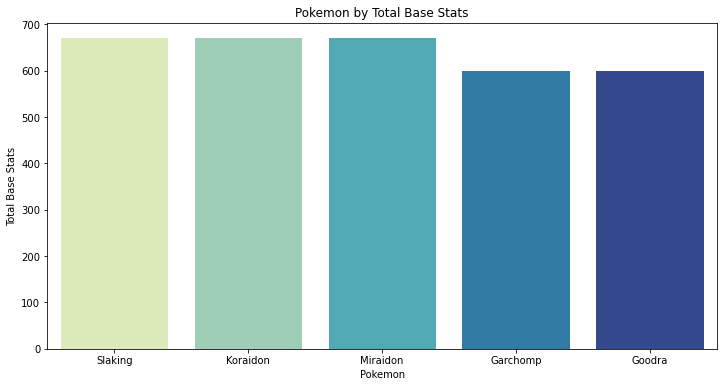

In [17]:
# Get top 5 highest total base stats
TopPokemon = df.nlargest(5, 'total_base_stats')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Pokemon_Name', y='total_base_stats', data=TopPokemon, palette="YlGnBu")

# Title and labels
plt.title("Pokemon by Total Base Stats")
plt.xlabel("Pokemon")
plt.ylabel("Total Base Stats")

# Show the plot
plt.show()

#### Conclusion: Slaking, Koraidon, and Miraidon are the top pokemon with Total Base States in Scarlet/Violet.

### Question 2: What are the most common Pokémons in Scarlet/Violet?

#### Create seaborn barplot

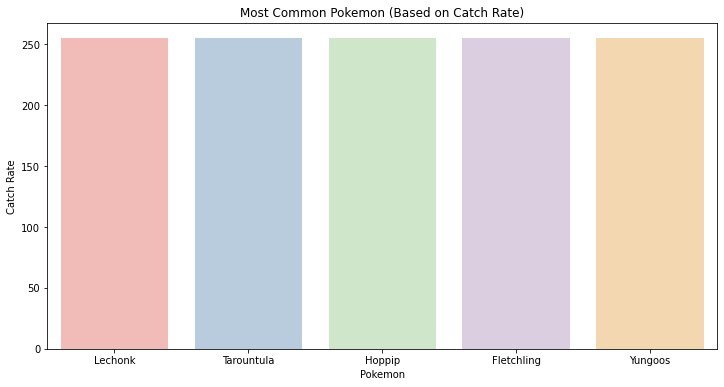

In [18]:
# Find the most common pokemon
MostPokemon = df.nlargest(5, 'catch_rate')

# Create the plot
plt.figure(figsize=(12, 6))

# Bar plot showing most common pokemon
sns.barplot(x='Pokemon_Name', y='catch_rate', data=MostPokemon, palette="Pastel1")

# Title and labels
plt.title("Most Common Pokemon (Based on Catch Rate)")
plt.xlabel("Pokemon")
plt.ylabel("Catch Rate")

plt.show()

#### Conclusion: The most common pokemon by catch rate is Lechnok, Tarountula, Hoppip, Fletchling, and Yungoos. They are found everywhere and are extremely easy to catch

### Question 3: What are the least common Pokémons in Scarlet/Violet?
#### Create seaborn barplot

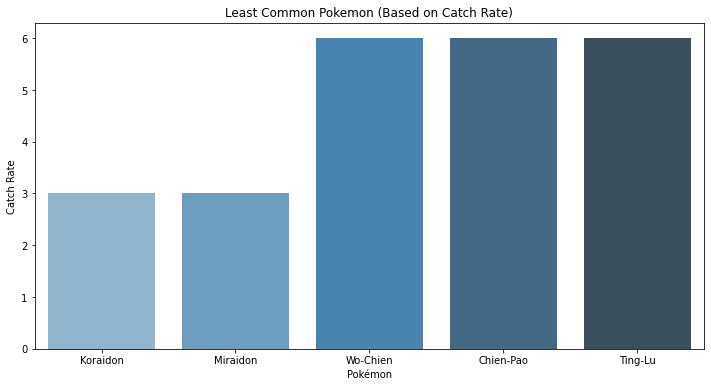

In [19]:
# Find the least common
LeastPokemon = df.nsmallest(5, 'catch_rate')

# Create a bar plot
plt.figure(figsize=(12, 6))

# Bar plot showing least common pokemon
sns.barplot(x='Pokemon_Name', y='catch_rate', data=LeastPokemon, palette="Blues_d")

# Title and labels
plt.title("Least Common Pokemon (Based on Catch Rate)")
plt.xlabel("Pokémon")
plt.ylabel("Catch Rate")

plt.show()

#### Conclusion: The least common pokemon by catch rate is Koraidon and Miraidon. These 2 pokemon can only be obtained via questline.

### Question 4: What are the 5 lowest egg cycles for this region?
#### Create seaborn barplot

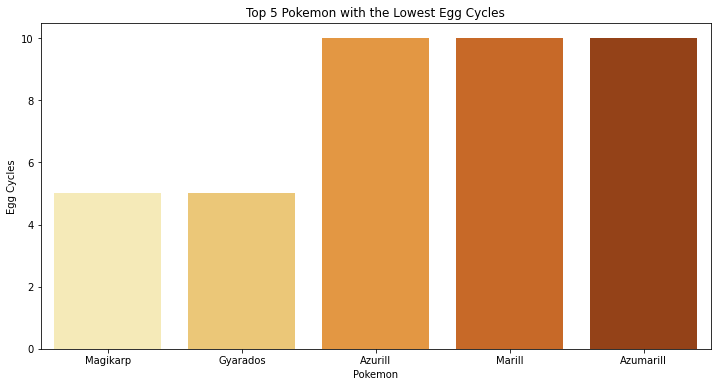

In [20]:
# Find the the lowest egg cycles
LowestCycles = df.nsmallest(5, 'egg_cycles')

# Create a bar plot
plt.figure(figsize=(12, 6))

# Bar plot showing the lowest egg cycles
sns.barplot(x='Pokemon_Name', y='egg_cycles', data=LowestCycles, palette="YlOrBr")

# Title and labels
plt.title("Top 5 Pokemon with the Lowest Egg Cycles")
plt.xlabel("Pokemon")
plt.ylabel("Egg Cycles")

plt.show()

#### Conclusion: The pokemon with the lowest egg cycles is Magikarp and Gyarados. This just means that it requires the least amount of steps to hatch